In [1]:
import numpy as np
import pandas as pd

#Libraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#Libraries for formattting and handling text 
import string 
import re

#Library for nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from textblob import TextBlob

#Library for Splitting Dataset
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
tweet = pd.read_csv(r"C:\Users\HP\Documents\MSc DATA SCIENCE\Disaster data\Data.csv")

In [3]:
tweet.head()

,Unnamed: 0,text,label
0,0,RT @uberdogfound: Please RT - Food needed for ...,Tornado
1,1,Please RT - Food needed for shelter in NC in a...,Tornado
2,2,‚ô°its raining and tornado warnings....about t...,Tornado
3,3,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,Tornado
4,4,Saved by the tornado warning....I'm just ready...,Not relevant


In [4]:
# Shuffle the Dataset.
# shuffled_df = tweet.sample(frac=1,random_state=4)
shuffled_df = tweet

df_earthquake = shuffled_df.loc[shuffled_df['label'] == 'Earthquake']

df_tornado = shuffled_df.loc[shuffled_df['label'] == 'Tornado'].sample(n=1294,random_state=42)
df_notrelevant = shuffled_df.loc[shuffled_df['label'] == 'Not relevant']
df_hurricane = shuffled_df.loc[shuffled_df['label'] == 'Hurricane'].sample(n=1294,random_state=42)
df_wildfire = shuffled_df.loc[shuffled_df['label'] == 'Wildfire'].sample(n=1294,random_state=42)
df_blizzard = shuffled_df.loc[shuffled_df['label'] == 'Blizzard'].sample(n=1294,random_state=42)
df_floods = shuffled_df.loc[shuffled_df['label'] == 'Floods'].sample(n=1294,random_state=42)


# Concatenate both dataframes again
original = pd.concat([df_earthquake,df_tornado,df_hurricane,df_wildfire,df_blizzard,df_floods,df_notrelevant])

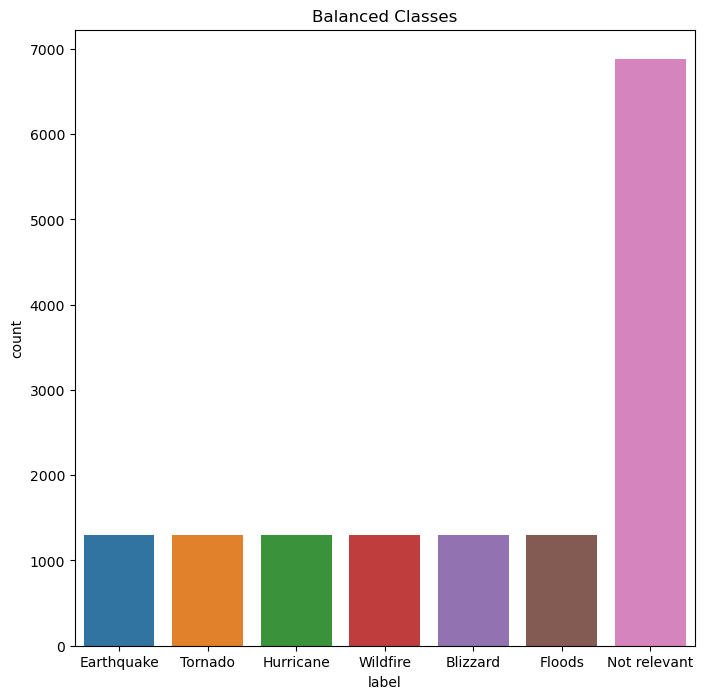

In [5]:
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('label', data=original)
plt.title('Balanced Classes')
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
original['label'] = le.fit_transform(original.label.values)

### Preprocessing

In [7]:
abbreviations = {
    "€" : "euro",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired",
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how does",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "ur": "your",
    "n": "and",
    "won't": "would not",
    "dis": "this",
    "brng": "bring"
}

In [8]:
#removing punctuation
def clean_text(text):
    cleantext = [char for char in text if char not in string.punctuation]
    cleantext = ''.join(cleantext)
    return cleantext

#removing urls
def url_remove(text):
    no_url = re.compile(r'https?://\S+|www\.\S+')
    return no_url.sub(r'',text)

#remove HTML
def html_remove(text):
    no_html = re.compile(r'<.*?>')
    return no_html.sub(r'',text)

#removing non printable characters
def not_ASCII_remove(text):
    asciiword = [word for word in text if word in string.printable]
    text = ''.join(asciiword)
    return text

#changing abbreviations by it's true meaning
def word_abbreviation(word):
     return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

# Replace all abbreviations
def replace_abbreviation(text):
    string = ""
    for word in text.split():
        string += word_abbreviation(word) + " "        
    return string

#removing mention and replacing by ''
def mention_remove(text):
    mention = re.compile(r'@\S+')
    return mention.sub(r' ',text)

#removing numbers and replacing it by ''
def number_remove(text):
    number = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return number.sub(r' ', text)

#removing emojis and replacing by ''
def emoji_remove(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' ', text)

#Replacing other smileys with ''
def sad_transcription(text):
    eye = "[8:=;]"
    nose = "['`\-]"
    smile = re.compile(r'[8:=;][\'\-]?[(\\/]')
    return smile.sub(r' ', text)

#replacing some smileys with ''
def smile_transcription(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[)dDp]')
    return smiley.sub(r' ', text)

#Replacing <3 with''
def heart_transcription(text):
    h = re.compile(r'<3')
    return h.sub(r' ',text)

def remove_dups_char(text):
    x = re.sub(r'\b(\w+)(?:\W+\1\b)+',r'\1', text)
    return x

def spelling_correction(text):
    text = TextBlob(text).correct()
    return text





In [9]:
def cleantweets(text):
    text = clean_text(text)
    text = url_remove(text)
    text = html_remove(text)
    text = not_ASCII_remove(text)
    text = replace_abbreviation(text)
    text = mention_remove(text)
    text = number_remove(text)
    text = emoji_remove(text)
    text = sad_transcription(text)
    text = smile_transcription(text)
    text = heart_transcription(text)
    text = remove_dups_char(text)
#     text = spelling_correction(text)
    return text

In [10]:
tweet['clean text'] = tweet['text'].apply(cleantweets)
tweet.head()

,Unnamed: 0,text,label,clean text
0,0,RT @uberdogfound: Please RT - Food needed for ...,Tornado,retweet uberdogfound Please retweet Food neede...
1,1,Please RT - Food needed for shelter in NC in a...,Tornado,Please retweet Food needed for shelter in NC i...
2,2,‚ô°its raining and tornado warnings....about t...,Tornado,its raining and tornado warningsabout to be in...
3,3,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,Tornado,laugh my ass off damn retweet LuCeCaNNoNn If I...
4,4,Saved by the tornado warning....I'm just ready...,Not relevant,Saved by the tornado warningIm just ready to e...


In [11]:
tweet['clean text'] = tweet['clean text'].apply(remove_dups_char)
tweet.head()

,Unnamed: 0,text,label,clean text
0,0,RT @uberdogfound: Please RT - Food needed for ...,Tornado,retweet uberdogfound Please retweet Food neede...
1,1,Please RT - Food needed for shelter in NC in a...,Tornado,Please retweet Food needed for shelter in NC i...
2,2,‚ô°its raining and tornado warnings....about t...,Tornado,its raining and tornado warningsabout to be in...
3,3,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,Tornado,laugh my ass off damn retweet LuCeCaNNoNn If I...
4,4,Saved by the tornado warning....I'm just ready...,Not relevant,Saved by the tornado warningIm just ready to e...


In [12]:
# tweet['clean text'] = tweet['clean text'].apply(spelling_correction)
# tweet.head()

### Word Lowercasing

In [12]:
tweet['clean text'] = tweet['clean text'].apply(str.lower)
tweet.head()

,Unnamed: 0,text,label,clean text
0,0,RT @uberdogfound: Please RT - Food needed for ...,Tornado,retweet uberdogfound please retweet food neede...
1,1,Please RT - Food needed for shelter in NC in a...,Tornado,please retweet food needed for shelter in nc i...
2,2,‚ô°its raining and tornado warnings....about t...,Tornado,its raining and tornado warningsabout to be in...
3,3,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,Tornado,laugh my ass off damn retweet lucecannonn if i...
4,4,Saved by the tornado warning....I'm just ready...,Not relevant,saved by the tornado warningim just ready to e...


### Tokenization

In [13]:
def tokenize(text):
    return nltk.word_tokenize(text)

tweet['clean text'] = tweet['clean text'].apply(tokenize)

In [14]:
tweet.head()

,Unnamed: 0,text,label,clean text
0,0,RT @uberdogfound: Please RT - Food needed for ...,Tornado,"[retweet, uberdogfound, please, retweet, food,..."
1,1,Please RT - Food needed for shelter in NC in a...,Tornado,"[please, retweet, food, needed, for, shelter, ..."
2,2,‚ô°its raining and tornado warnings....about t...,Tornado,"[its, raining, and, tornado, warningsabout, to..."
3,3,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,Tornado,"[laugh, my, ass, off, damn, retweet, lucecanno..."
4,4,Saved by the tornado warning....I'm just ready...,Not relevant,"[saved, by, the, tornado, warningim, just, rea..."


### Stopwords removal

In [15]:
def remove_stopwords(text):
    text = [word for word in text if word.lower() not in stopwords.words('english')]
    return text

In [16]:
tweet['clean text'] = tweet['clean text'].apply(remove_stopwords)
tweet.head()

,Unnamed: 0,text,label,clean text
0,0,RT @uberdogfound: Please RT - Food needed for ...,Tornado,"[retweet, uberdogfound, please, retweet, food,..."
1,1,Please RT - Food needed for shelter in NC in a...,Tornado,"[please, retweet, food, needed, shelter, nc, a..."
2,2,‚ô°its raining and tornado warnings....about t...,Tornado,"[raining, tornado, warningsabout, coma, eating..."
3,3,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,Tornado,"[laugh, ass, damn, retweet, lucecannonn, dont,..."
4,4,Saved by the tornado warning....I'm just ready...,Not relevant,"[saved, tornado, warningim, ready, eat, good, ..."


### Lemmatization

In [17]:
lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    lemmatized_text = ([lemmatizer.lemmatize(words) for words in text])
    return lemmatized_text

In [20]:
tweet['clean text'] = tweet['clean text'].apply(lemmatize)
tweet.head()

,Unnamed: 0,text,label,clean text
0,0,RT @uberdogfound: Please RT - Food needed for ...,Tornado,"[retweet, uberdogfound, please, retweet, food,..."
1,1,Please RT - Food needed for shelter in NC in a...,Tornado,"[please, retweet, food, needed, shelter, nc, a..."
2,2,‚ô°its raining and tornado warnings....about t...,Tornado,"[raining, tornado, warningsabout, coma, eating..."
3,3,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,Tornado,"[laugh, a, damn, retweet, lucecannonn, dont, g..."
4,4,Saved by the tornado warning....I'm just ready...,Not relevant,"[saved, tornado, warningim, ready, eat, good, ..."


### Processing the dataset

In [21]:
words = list(tweet['clean text'].values)

In [22]:
l = []
j=0
k=[]
for i in words:
    l.append(i)
    text = ' '.join(l[j])
    k.append(text)
    j=j+1
    

In [23]:
se = pd.Series(k)
tweet['new text'] = se.values

In [24]:
tweet.tail(5)

,Unnamed: 0,text,label,clean text,new text
25815,25815,"Today, I heard the news about Nepal earthquake...",Not relevant,"[today, heard, news, nepal, earthquake, brothe...",today heard news nepal earthquake brother thou...
25816,25816,Vigil for Nepal earthquake victims http://t.co...,Not relevant,"[vigil, nepal, earthquake, victim, httptcofasrip]",vigil nepal earthquake victim httptcofasrip
25817,25817,We are with you! God Bless you! #Nepal #earthq...,Not relevant,"[god, bless, nepal, earthquake]",god bless nepal earthquake
25818,25818,"RT @BreakingNews Police say at least 4,352 peo...",Not relevant,"[retweet, breakingnews, police, say, least, pe...",retweet breakingnews police say least people c...
25819,25819,Keep #Nepal in your thoughts after the horribl...,Not relevant,"[keep, nepal, thought, horrible, mag, earthqua...",keep nepal thought horrible mag earthquake put...


In [25]:
tweet.tail(10)

,Unnamed: 0,text,label,clean text,new text
25810,25810,Video: Nepal earthquake: Digging with... http:...,Not relevant,"[video, nepal, earthquake, digging, httptcozqd...",video nepal earthquake digging httptcozqdvkwnm...
25811,25811,RT @loaideeb: When I see the outcomes of the r...,Not relevant,"[retweet, loaideeb, see, outcome, recent, eart...",retweet loaideeb see outcome recent earthquake...
25812,25812,Is the earthquake in Nepal n North east of Ind...,Not relevant,"[earthquake, nepal, north, east, india, seriou...",earthquake nepal north east india seriously th...
25813,25813,What it was like when the Nepal earthquake str...,Not relevant,"[like, nepal, earthquake, struck, httptco, ei,...",like nepal earthquake struck httptco ei oxlonw
25814,25814,"Nepal earthquake 2015: Google exec among 2,000...",Not relevant,"[nepal, earthquake, google, exec, among, ki, h...",nepal earthquake google exec among ki httptcod...
25815,25815,"Today, I heard the news about Nepal earthquake...",Not relevant,"[today, heard, news, nepal, earthquake, brothe...",today heard news nepal earthquake brother thou...
25816,25816,Vigil for Nepal earthquake victims http://t.co...,Not relevant,"[vigil, nepal, earthquake, victim, httptcofasrip]",vigil nepal earthquake victim httptcofasrip
25817,25817,We are with you! God Bless you! #Nepal #earthq...,Not relevant,"[god, bless, nepal, earthquake]",god bless nepal earthquake
25818,25818,"RT @BreakingNews Police say at least 4,352 peo...",Not relevant,"[retweet, breakingnews, police, say, least, pe...",retweet breakingnews police say least people c...
25819,25819,Keep #Nepal in your thoughts after the horribl...,Not relevant,"[keep, nepal, thought, horrible, mag, earthqua...",keep nepal thought horrible mag earthquake put...


In [26]:
tweet['label'].value_counts()

Not relevant    6882
Hurricane       5239
Wildfire        4192
Blizzard        3284
Floods          2647
Tornado         2282
Earthquake      1294
Name: label, dtype: int64

In [27]:
tweet = tweet.drop(['Unnamed: 0'], axis = 1)

In [28]:
# Shuffle the Dataset.
# shuffled_df = tweet.sample(frac=1,random_state=4)
shuffled_df = tweet

df_earthquake = shuffled_df.loc[shuffled_df['label'] == 'Earthquake']

df_tornado = shuffled_df.loc[shuffled_df['label'] == 'Tornado'].sample(n=1294,random_state=42)
df_notrelevant = shuffled_df.loc[shuffled_df['label'] == 'Not relevant'].sample(n=1294,random_state=42)
df_hurricane = shuffled_df.loc[shuffled_df['label'] == 'Hurricane'].sample(n=1294,random_state=42)
df_wildfire = shuffled_df.loc[shuffled_df['label'] == 'Wildfire'].sample(n=1294,random_state=42)
df_blizzard = shuffled_df.loc[shuffled_df['label'] == 'Blizzard'].sample(n=1294,random_state=42)
df_floods = shuffled_df.loc[shuffled_df['label'] == 'Floods'].sample(n=1294,random_state=42)


# Concatenate both dataframes again
original = pd.concat([df_earthquake,df_tornado,df_hurricane,df_wildfire,df_blizzard,df_floods,df_notrelevant])

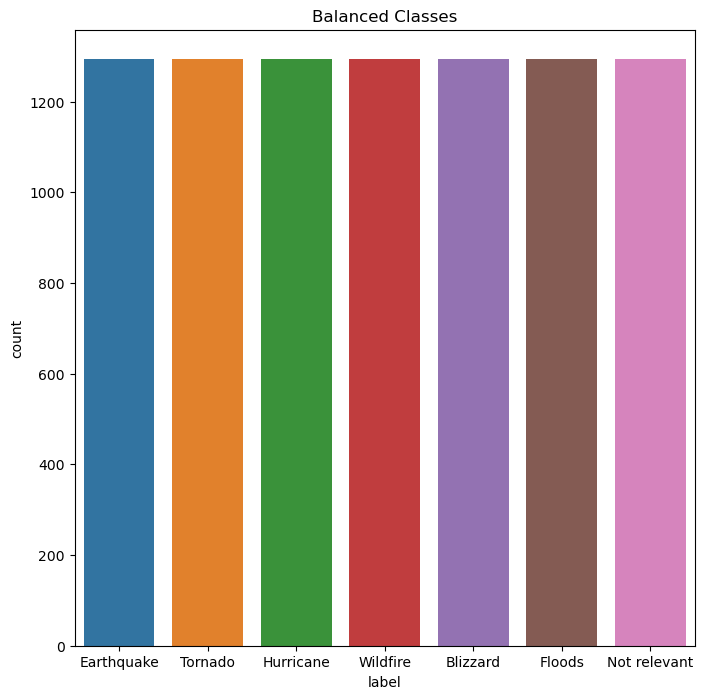

In [29]:
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('label', data=original)
plt.title('Balanced Classes')
plt.show()

In [30]:
original['label'].value_counts()

Earthquake      1294
Tornado         1294
Hurricane       1294
Wildfire        1294
Blizzard        1294
Floods          1294
Not relevant    1294
Name: label, dtype: int64

### Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
original['label'] = le.fit_transform(original.label.values)

In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(original['label'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


In [33]:
original.head()

,text,label,clean text,new text
23616,Help @livelokai spread the word: $1 for repost...,1,"[help, livelokai, spread, word, reposts, stayh...",help livelokai spread word reposts stayhopeful...
23617,#news #media #video Nepal Earthquake: Over 400...,1,"[news, medium, video, nepal, earthquake, kille...",news medium video nepal earthquake killed doze...
23618,RT @ntparti: China rescue team leaves for #Nep...,1,"[retweet, ntparti, china, rescue, team, leaf, ...",retweet ntparti china rescue team leaf nepal e...
23619,My thoughts go out to my #gurkha brethren. I h...,1,"[thought, go, gurkha, brother, hope, family, s...",thought go gurkha brother hope family safe nep...
23620,RT @FOX40: How You Can Help Victims of the Nep...,1,"[retweet, fox, help, victim, nepalearthquake, ...",retweet fox help victim nepalearthquake httptc...


In [34]:
original.iloc[:,3]

23616    help livelokai spread word reposts stayhopeful...
23617    news medium video nepal earthquake killed doze...
23618    retweet ntparti china rescue team leaf nepal e...
23619    thought go gurkha brother hope family safe nep...
23620    retweet fox help victim nepalearthquake httptc...
                               ...                        
2856     retweet tornadohunt tornado may passed directl...
11248    good day twin tater tot casserole ready oven b...
21695    dont understand many trying draw fund fema acc...
14177    kind hard even parse mean herewas trying racis...
9347     chilln home blizzard e coast watchn bull v cav...
Name: new text, Length: 9058, dtype: object

### Most frequent words

In [36]:
from collections import Counter

In [37]:
# split_it = original['clean text'].split()

In [38]:
original['new text']

23616    help livelokai spread word reposts stayhopeful...
23617    news medium video nepal earthquake killed doze...
23618    retweet ntparti china rescue team leaf nepal e...
23619    thought go gurkha brother hope family safe nep...
23620    retweet fox help victim nepalearthquake httptc...
                               ...                        
2856     retweet tornadohunt tornado may passed directl...
11248    good day twin tater tot casserole ready oven b...
21695    dont understand many trying draw fund fema acc...
14177    kind hard even parse mean herewas trying racis...
9347     chilln home blizzard e coast watchn bull v cav...
Name: new text, Length: 9058, dtype: object

In [39]:
# words = list(original['new text'])

In [40]:
# words

In [41]:
# l = []
# for i in words:
#         l.append(j)

In [42]:
# commonwords = nltk.FreqDist(l)
# mostcommon = commonwords.most_common(100)

In [43]:
# mostcommon

### Classification with TFIDF and SVM

In [44]:
text_list=[]

#append every word in snow column to a text to use tf-idf
for text in original['clean text']:
    text=' '.join([word for word in text if word.isalnum()])
    text_list.append(text)

text_list[:7]

['help livelokai spread word reposts stayhopefulnepal httptcouhjz gaobu nepalearthquake httptco opbynvn',
 'news medium video nepal earthquake killed dozen trapped magnitude quake httptcowzitunshxc journalism report',
 'retweet ntparti china rescue team leaf nepal expected arrive katmandu midday sunday earthquake httptcovu zuzgsq httpt',
 'thought go gurkha brother hope family safe nepalquake nepalearthquake httptcopmcwmqci',
 'retweet fox help victim nepalearthquake httptcogfcxaeiuds',
 'retweet boredpanda monthold baby trapped hour nepal earthquake rubble finally rescued pic httptcod cjvyviuy httpt',
 'ndtv r supply going people r saying r gettin anything nd say crore supply hav sent nepalearthquake']

In [45]:
text = original['new text']
y = original['label']

In [46]:
tfidf = TfidfVectorizer(ngram_range=(1,1))
X = tfidf.fit_transform(text_list)

In [47]:
feature_names=np.array(tfidf.get_feature_names())

In [48]:
feature_names

array(['aa', 'aaa', 'aaaaahhhhh', ..., 'zzmlo', 'zzxway',
       'zzztherewerepeoplewhowerenzzztabletogetoutzzzfivetrappedincarsburntoxyy'],
      dtype='<U162')

In [49]:
max_spars = X.max(0).toarray()[0]# Get largest tfidf values across all documents.

In [50]:
max_spars

array([0.37296356, 0.38344614, 0.40736334, ..., 0.40144206, 0.48054661,
       0.34067464])

In [51]:
sorted_index = max_spars.argsort() # Sorted indices
sorted_index

array([ 9269, 20754,  9208, ..., 13001, 15408, 18681], dtype=int64)

In [52]:
sorted_sparse = max_spars[sorted_index] # Sorted TFIDF values
sorted_sparse

array([0.04436518, 0.04436518, 0.04436518, ..., 0.8875658 , 0.88826815,
       0.91860165])

In [53]:
largest_series = pd.Series(sorted_sparse[-5000:][::-1], index=feature_names[sorted_index[-5000:][::-1]])
largest_series[largest_series>0.80]

sympathy                0.918602
prayfornepal            0.888268
mourn                   0.887566
rip                     0.887480
break                   0.878389
praying                 0.875157
sad                     0.860073
dumb                    0.849188
fucking                 0.847313
yayyy                   0.843781
pictwittercompletbun    0.841365
gettin                  0.838254
pain                    0.836035
prayer                  0.835775
awful                   0.834495
great                   0.831227
billboard               0.829755
death                   0.827116
scary                   0.824271
httptcoofmrws           0.823050
relevant                0.822002
criticized              0.820912
horrible                0.818940
medshare                0.815329
absolutely              0.808272
given                   0.805238
notrelevant             0.802086
held                    0.801154
dtype: float64

In [80]:
print(tfidf.vocabulary_)

{'help': 7025, 'livelokai': 11885, 'spread': 18098, 'word': 21078, 'reposts': 16371, 'stayhopefulnepal': 18229, 'httptcouhjz': 9418, 'gaobu': 6119, 'nepalearthquake': 13408, 'httptco': 8930, 'opbynvn': 14107, 'news': 13470, 'medium': 12544, 'video': 20331, 'nepal': 13404, 'earthquake': 4567, 'killed': 11273, 'dozen': 4314, 'trapped': 19506, 'magnitude': 12229, 'quake': 15880, 'httptcowzitunshxc': 9489, 'journalism': 10982, 'report': 16364, 'retweet': 16464, 'ntparti': 13787, 'china': 2646, 'rescue': 16390, 'team': 18831, 'leaf': 11655, 'expected': 5173, 'arrive': 749, 'katmandu': 11140, 'midday': 12690, 'sunday': 18513, 'httptcovu': 9461, 'zuzgsq': 21760, 'httpt': 8928, 'thought': 19121, 'go': 6369, 'gurkha': 6681, 'brother': 1877, 'hope': 7296, 'family': 5298, 'safe': 16890, 'nepalquake': 13431, 'httptcopmcwmqci': 9298, 'fox': 5888, 'victim': 20323, 'httptcogfcxaeiuds': 9074, 'boredpanda': 1687, 'monthold': 12928, 'baby': 1036, 'hour': 7348, 'rubble': 16780, 'finally': 5497, 'rescued'

In [81]:
X

<9058x21784 sparse matrix of type '<class 'numpy.float64'>'
	with 117000 stored elements in Compressed Sparse Row format>

In [82]:
pd.DataFrame(X.toarray(), 
             index=['sentence '+str(i) 
                    for i in range(1, 1+len(original['new text']))],
             columns=tfidf.get_feature_names())

,aa,aaa,aaaaahhhhh,aaahhhhh,aaand,aadlerz,aaelsoukkary,aagbdqiv,aagjo,aahanasharma,...,zxle,zy,zyb,zyizjhpictwittercom,zyizjhpictwittercomhwbxzizadv,zz,zzl,zzmlo,zzxway,zzztherewerepeoplewhowerenzzztabletogetoutzzzfivetrappedincarsburntoxyy
sentence 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence 9054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 9055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 9056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 9057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
tfidf.get_feature_names_out()

array(['aa', 'aaa', 'aaaaahhhhh', ..., 'zzmlo', 'zzxway',
       'zzztherewerepeoplewhowerenzzztabletogetoutzzzfivetrappedincarsburntoxyy'],
      dtype=object)

In [84]:
X.shape

(9058, 21784)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0, stratify = y)

In [86]:
def run_SVM(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    print()
    print('Classification Report')
    print(classification_report(y_test, y_pred))
    print("The accuracy of the model is: ", accuracy_score(y_test, y_pred))

In [87]:
from sklearn.svm import LinearSVC

In [89]:
clf = LinearSVC()
run_SVM(clf, X_train, X_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       259
           1       0.90      0.99      0.94       259
           2       0.89      0.96      0.92       259
           3       0.82      0.88      0.85       259
           4       0.72      0.40      0.51       259
           5       0.87      0.98      0.92       259
           6       0.95      0.99      0.97       258

    accuracy                           0.88      1812
   macro avg       0.87      0.88      0.87      1812
weighted avg       0.87      0.88      0.87      1812

The accuracy of the model is:  0.8818984547461368


When the number of tweets of non relevant tweets were high and rest were balanced, the accuracy was 75.
And when the complete data is balanced, the accuracy is 88.

### TFIDF, SVM with Kernal radial bias function

In [90]:
from sklearn import svm
linear = svm.SVC(kernel = 'rbf', gamma = 1, C=1, decision_function_shape = 'ovo').fit(X_train,y_train)

In [91]:
pred = linear.predict(X_test)

In [92]:
accuracy_rbf = linear.score(X_test, y_test)

In [93]:
accuracy_rbf

0.8774834437086093

In [94]:
accuracy_score(y_test, pred)

0.8774834437086093

In [95]:
linear1 = svm.SVC(kernel = 'linear', gamma = 1, C=1, decision_function_shape = 'ovo').fit(X_train,y_train)
pred1 = linear1.predict(X_test)
accuracy_linear = linear1.score(X_test, y_test)
accuracy_linear

0.8824503311258278

In [96]:
poly = svm.SVC(kernel = 'poly', gamma = 1, C=1, decision_function_shape = 'ovo').fit(X_train,y_train)
pred2 = poly.predict(X_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_poly

0.7075055187637969

In [97]:
accuracy_score(y_test, pred2)

0.7075055187637969

In [98]:
sig = svm.SVC(kernel = 'sigmoid', gamma = 1, C=1, decision_function_shape = 'ovo').fit(X_train,y_train)
pred3 = sig.predict(X_test)
accuracy_sig = sig.score(X_test, y_test)
accuracy_sig

0.8824503311258278

### SVM and Word2Vec

In [99]:
import spacy

In [100]:
import spacy.cli

spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [101]:
import en_core_web_lg
nlp = en_core_web_lg.load()

In [102]:
def get_vec(x):
    doc = nlp(x)
    vec = doc.vector
    return vec

In [103]:
original['vec'] = original['text'].apply(lambda x: get_vec(x))

In [104]:
original.head()

,text,label,clean text,new text,vec
23616,Help @livelokai spread the word: $1 for repost...,1,"[help, livelokai, spread, word, reposts, stayh...",help livelokai spread word reposts stayhopeful...,"[0.6531312, -1.1433339, -0.87459123, 1.5316694..."
23617,#news #media #video Nepal Earthquake: Over 400...,1,"[news, medium, video, nepal, earthquake, kille...",news medium video nepal earthquake killed doze...,"[0.9045588, -0.8182316, -0.54600644, 0.5866364..."
23618,RT @ntparti: China rescue team leaves for #Nep...,1,"[retweet, ntparti, china, rescue, team, leaf, ...",retweet ntparti china rescue team leaf nepal e...,"[0.9047032, 0.17660427, -0.28391075, -0.015849..."
23619,My thoughts go out to my #gurkha brethren. I h...,1,"[thought, go, gurkha, brother, hope, family, s...",thought go gurkha brother hope family safe nep...,"[1.2260891, 2.3402262, -2.8925087, -0.96210843..."
23620,RT @FOX40: How You Can Help Victims of the Nep...,1,"[retweet, fox, help, victim, nepalearthquake, ...",retweet fox help victim nepalearthquake httptc...,"[0.42272928, -0.8946925, 0.1284192, -0.1957083..."


In [105]:
X = original['vec'].to_numpy()
X = X.reshape(-1,1)

In [106]:
X.shape

(9058, 1)

In [107]:
X = np.concatenate(np.concatenate(X, axis = 0), axis = 0).reshape(-1, 300)

In [108]:
X.shape

(9058, 300)

In [109]:
y = original['label']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0, stratify = y)

In [111]:
%%time
clf = LinearSVC()
run_SVM(clf, X_train, X_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       259
           1       0.89      0.90      0.89       259
           2       0.85      0.85      0.85       259
           3       0.77      0.54      0.64       259
           4       0.31      0.53      0.39       259
           5       0.85      0.69      0.76       259
           6       0.88      0.85      0.87       258

    accuracy                           0.73      1812
   macro avg       0.78      0.73      0.75      1812
weighted avg       0.78      0.73      0.75      1812

The accuracy of the model is:  0.7306843267108167
Wall time: 15.6 s


In [112]:
!pip install git+https://github.com/LIAAD/yake
import yake

  Running command git clone --filter=blob:none --quiet https://github.com/LIAAD/yake 'C:\Users\HP\AppData\Local\Temp\pip-req-build-lanwp3ka'


  Cloning https://github.com/LIAAD/yake to c:\users\hp\appdata\local\temp\pip-req-build-lanwp3ka
  Resolved https://github.com/LIAAD/yake to commit 8d71d94ded93fb77f1361f62e5264f19b9c91cd7
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


In [113]:
kw_extractor = yake.KeywordExtractor(top=10, stopwords=None)
keywords = kw_extractor.extract_keywords(original['new text'])
for kw, v in keywords:
    print("Keyphrase: ",kw, ": score", v)

Warning! Exception: 'Series' object has no attribute 'split' generated by the following text: '23616    help livelokai spread word reposts stayhopeful...
23617    news medium video nepal earthquake killed doze...
23618    retweet ntparti china rescue team leaf nepal e...
23619    thought go gurkha brother hope family safe nep...
23620    retweet fox help victim nepalearthquake httptc...
                               ...                        
2856     retweet tornadohunt tornado may passed directl...
11248    good day twin tater tot casserole ready oven b...
21695    dont understand many trying draw fund fema acc...
14177    kind hard even parse mean herewas trying racis...
9347     chilln home blizzard e coast watchn bull v cav...
Name: new text, Length: 9058, dtype: object' 


In [ ]:
keywords